# **February Phase 2 OIB-SIP Internship-Data Science**
*By-Karan Sardar*

# **IRIS FLOWER CLASSIFICATION**
**TASK 1**

***Problem Statement:***
*Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.*

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **LOGISTIC REGRESSION**

In [53]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: xlabel='Species', ylabel='count'>

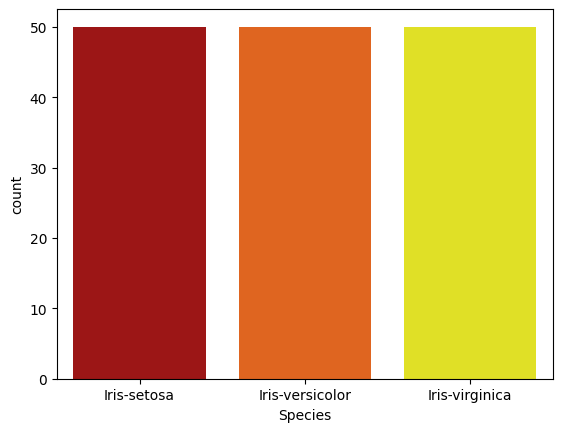

In [54]:
sns.countplot(x=df['Species'],data=df,palette='hot')

In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [55]:
#Label Encoding done here
df["Species"] = df["Species"].astype('category')
df.dtypes

Id                  int64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [6]:
df["Species"] = df["Species"].cat.codes
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


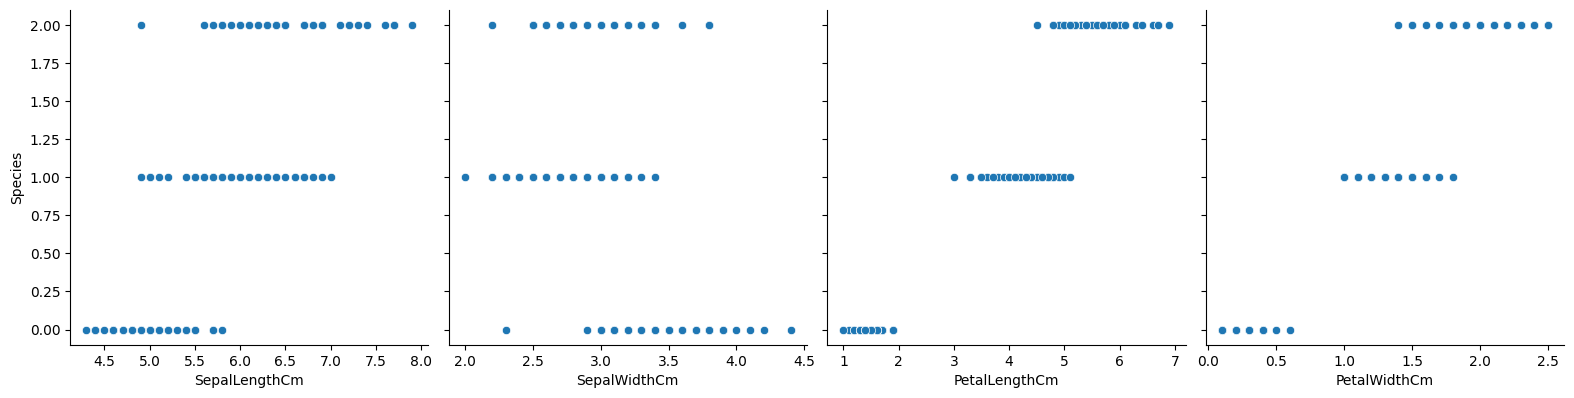

In [7]:
#plotting a pairplot to understand multicollinearity
sns.pairplot(df,x_vars=['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm'],y_vars='Species',size=4,aspect=1,kind='scatter')

<Axes: >

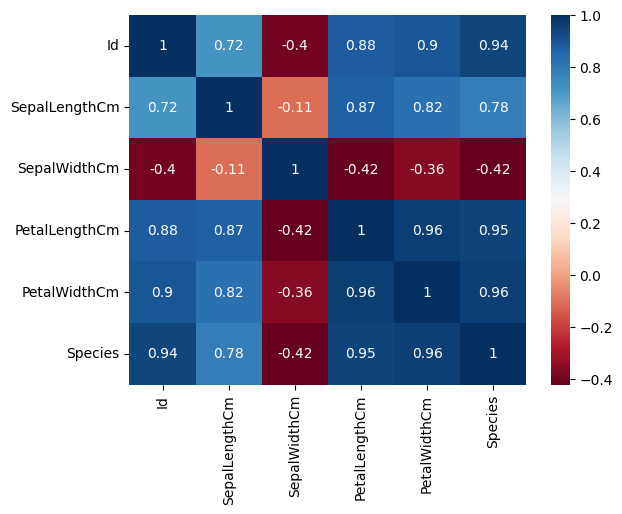

In [8]:
#plotting a heatmap to understand correlation
sns.heatmap(df.corr(), cmap = 'RdBu', annot = True )

In [9]:
X=df.iloc[:,1:5]
X.drop('SepalWidthCm',axis=1,inplace=True)
X.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [10]:
Y=df.iloc[:,5]

In [11]:
x1=X.to_numpy()
y1=Y.to_numpy()
y2=y1.reshape(-1,1)

In [12]:
#train test split to divide training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x1, y2, train_size = 0.7, test_size = 0.3, random_state = 43 )

In [13]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression()

In [14]:
logi.fit(X_train,y_train)

LogisticRegression()

In [15]:
y_pred=logi.predict(X_test)
print(y_pred)

[0 0 2 1 2 0 2 1 1 1 0 1 2 0 1 1 0 0 2 2 0 0 0 2 2 2 0 1 0 0 1 0 1 1 2 2 1
 2 1 1 1 2 1 2 0]


In [16]:
score=logi.score(X_test,y_test)
score2=logi.score(X_train,y_train)
print('Accuracy score on train is:',score2*100)
print('Accuracy score on test is:',score*100)

Accuracy score on train is: 96.19047619047619
Accuracy score on test is: 97.77777777777777


In [17]:
from sklearn.metrics import confusion_matrix
confu=confusion_matrix(y_test,y_pred)
print(confu)

[[15  0  0]
 [ 0 16  1]
 [ 0  0 13]]


In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# **DECISION** **TREE**

In [20]:
#importing decision tree model
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion='entropy')
dec.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [21]:
y_pred2=dec.predict(X_test)
y_pred2

array([0, 0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       0], dtype=int8)

In [22]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      0.94      0.91        17
           2       0.92      0.85      0.88        13

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [23]:
confu2=confusion_matrix(y_test,y_pred2)
print(confu2)

[[15  0  0]
 [ 0 16  1]
 [ 0  2 11]]


# **RANDOM FOREST**

In [24]:
#importing Random forest model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_rf_test=rf.predict(X_test)
y_pred_rf_train= rf.predict(X_train)

In [25]:
y_pred3=rf.predict(X_test)
y_pred3

array([0, 0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       0], dtype=int8)

In [26]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      0.94      0.91        17
           2       0.92      0.85      0.88        13

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [27]:
confu3=confusion_matrix(y_test,y_pred3)
print(confu3)

[[15  0  0]
 [ 0 16  1]
 [ 0  2 11]]


# **ADABOOST**

In [28]:
#importing Adaptive Boosting model with base estimator : Linear regression
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(base_estimator=dec)

In [29]:
ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'))

In [30]:
y_pred_ada_test=ada.predict(X_test)
y_pred_ada_train= ada.predict(X_train)

In [31]:
print(classification_report(y_test, y_pred_ada_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      0.94      0.91        17
           2       0.92      0.85      0.88        13

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [32]:
confu4=confusion_matrix(y_test,y_pred_ada_test)
print(confu4)

[[15  0  0]
 [ 0 16  1]
 [ 0  2 11]]


# **GRADIENT BOOST**

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gb=AdaBoostClassifier(base_estimator=logi)

In [34]:
gb.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=LogisticRegression())

In [35]:
y_pred_gb_test=gb.predict(X_test)
y_pred_gb_train= gb.predict(X_train)

In [36]:
print(classification_report(y_test, y_pred_gb_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.77      1.00      0.87        17
           2       1.00      0.62      0.76        13

    accuracy                           0.89        45
   macro avg       0.92      0.87      0.88        45
weighted avg       0.91      0.89      0.88        45



In [37]:
confu5=confusion_matrix(y_test,y_pred_gb_test)
print(confu5)

[[15  0  0]
 [ 0 17  0]
 [ 0  5  8]]


# **HYPERPARAMETER TUNING (On Logistic Regression)**

In [38]:
params = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.arange(0,5,0.5),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [39]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(logi,param_grid=params,cv=3,n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             scoring='accuracy')

In [40]:
best_param=grid_search.best_params_
best_param

{'C': 0.5, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

In [41]:
Logi2=LogisticRegression(max_iter=100,penalty='l1',C=0.5,solver='saga')

In [42]:
Logi2.fit(X_train,y_train)

LogisticRegression(C=0.5, penalty='l1', solver='saga')

In [43]:
y_pred_hyper=logi.predict(X_test)
print(y_pred_hyper)

[0 0 2 1 2 0 2 1 1 1 0 1 2 0 1 1 0 0 2 2 0 0 0 2 2 2 0 1 0 0 1 0 1 1 2 2 1
 2 1 1 1 2 1 2 0]


In [44]:
score_hyper=Logi2.score(X_test,y_test)
score2_hyper=Logi2.score(X_train,y_train)
print('Accuracy score on train is:',score_hyper*100)
print('Accuracy score on test is:',score2_hyper*100)

Accuracy score on train is: 100.0
Accuracy score on test is: 97.14285714285714


In [45]:
print(classification_report(y_test, y_pred_hyper))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [56]:
confu6=confusion_matrix(y_test,y_pred_hyper)
print(confu6)

[[15  0  0]
 [ 0 16  1]
 [ 0  0 13]]


**Tuning the Logistic Regression model gave an outstanding 98% accuracy on the test data and 100% on training data.**